# Climate change and economics

___________

This is for a python workshop with economics students to assess whether economists should suggest policies to address the climate crisis.



__The brief__

The Bank of England have recently carried out a review on how climate change might affect the financial services sector. They are also looking at how the Bank can ensure financial resilience at the UK transitions to a low carbon economy. Some groups have been critical of this approach. You are asked to suggest why there might there a case for economists to prioritise work on the climate crisis.

# Motivation 



# Import relevant packages

Students will be familiar with most these packages except seaborn and geopandas which are used for data visualisation. 

#### A word of caution when using geopandas

You need to make sure you carefully follow the installation documentation, which is available to read <a href="https://geopandas.readthedocs.io/en/latest/install.html">here</a>  

When using conda, make sure you use this new environment 'geo_env' so that you don't have any conflicts when using geopandas. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Import data

This will be a more discursive task. There is no correct answer and there will be a few datasets you'll be using to get an idea of what the issue is and why this might be an issue for economists. 

* The data has been taken from the OECD and is available <a href="https://data.oecd.org/air/air-pollution-exposure.htm">here</a> 
   * The data provides: Microgram per cubic metre and % of population 

* Data on the economic impact of climate change is available <a href="https://web.stanford.edu/~mburke/climate/data.html">here</a>, cite: Burke, Hsiang, and Miguel (2015)

* Website used for shapefiles <a href="https://www.naturalearthdata.com/downloads/110m-cultural-vectors/">here</a> then use 'Download Countries version 4.1.0'

#### Here we begin with the OECD air pollution exposure data

In [19]:
airpoll= pd.read_csv('OCED(2019)Airpollution_exposure.csv', parse_dates=['TIME'])

In [20]:
airpoll.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POLLUTIONEXP,EXPOS2PM25,MICGRCUBM,A,1990-01-01,10.36402,NaN
1,AUS,POLLUTIONEXP,EXPOS2PM25,MICGRCUBM,A,1995-01-01,10.41745,NaN
2,AUS,POLLUTIONEXP,EXPOS2PM25,MICGRCUBM,A,2000-01-01,10.73562,NaN
3,AUS,POLLUTIONEXP,EXPOS2PM25,MICGRCUBM,A,2005-01-01,10.52515,NaN
4,AUS,POLLUTIONEXP,EXPOS2PM25,MICGRCUBM,A,2010-01-01,10.53559,NaN


# Inspect the data 

Once you import the data, you want to look at what the data is telling us and how we can use it.

Need to get to know the data you're using before doing any analysis. 

Note down some of the interesting stats from here - this will be helpful when giving your presentation

In [21]:
airpoll.shape

(4056, 8)

In [22]:
airpoll.describe()

,Value,Flag Codes
count,4056.000000,0.0
mean,60.638246,NaN
std,37.147763,NaN
min,0.000000,NaN
25%,23.208385,NaN
50%,60.455920,NaN
75%,99.756260,NaN
max,103.193240,NaN


In [23]:
# here you'll see all the country codes 
airpoll.LOCATION.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'GBR', 'USA', 'G7M', 'AFG', 'ALB', 'DZA', 'AGO', 'ARG', 'ARM',
       'AZE', 'BHR', 'BGD', 'BLR', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP',
       'PRK', 'COD', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'ETH', 'FJI', 'GAB', 'GMB', 'GEO', 'GHA', 'GTM', 'GIN', 'GNB',
       'HTI', 'HND', 'HKG', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JAM',
       'JOR', 'KAZ', 'KEN', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LIE', 'LTU', 'MKD', 'MDG', 'MWI', 'MYS', 'MLI',
       'MLT', 'MRT', 'MUS', 'MDA', 'MNG', 'MAR', 'MOZ', 'MMR', 'NAM',
       'NPL', 'NIC', 'NER', 'NGA', 'OMN', 'PAK', 'PAN', 'PNG', 'PRY',
       'PER', 'PHL',

In [24]:
airpoll.info

<bound method DataFrame.info of      LOCATION     INDICATOR     SUBJECT    MEASURE FREQUENCY       TIME  \
0         AUS  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 1990-01-01   
1         AUS  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 1995-01-01   
2         AUS  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2000-01-01   
3         AUS  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2005-01-01   
4         AUS  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2010-01-01   
...       ...           ...         ...        ...       ...        ...   
4051    OECDE  POLLUTIONEXP  EXPOS2PM25     PC_POP         A 2013-01-01   
4052    OECDE  POLLUTIONEXP  EXPOS2PM25     PC_POP         A 2014-01-01   
4053    OECDE  POLLUTIONEXP  EXPOS2PM25     PC_POP         A 2015-01-01   
4054    OECDE  POLLUTIONEXP  EXPOS2PM25     PC_POP         A 2016-01-01   
4055    OECDE  POLLUTIONEXP  EXPOS2PM25     PC_POP         A 2017-01-01   

         Value  Flag Codes  
0     10.36402         NaN  
1     10.

In [28]:
pd.isnull(airpoll)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
4051,False,False,False,False,False,False,False,True
4052,False,False,False,False,False,False,False,True
4053,False,False,False,False,False,False,False,True
4054,False,False,False,False,False,False,False,True


In [29]:
airpoll.count()

LOCATION      4056
INDICATOR     4056
SUBJECT       4056
MEASURE       4056
FREQUENCY     4056
TIME          4056
Value         4056
Flag Codes       0
dtype: int64

### Lets see how UK compares to US, China and the OECD average 
__Q__: Is this an example of market failure - who does air pollution effect on a global scale?

In [25]:
print(airpoll[airpoll['LOCATION'] == 'GBR']),
print(airpoll[airpoll['LOCATION'] == 'USA']),
print(airpoll[airpoll['LOCATION'] == 'CHN']),
print(airpoll[airpoll['LOCATION'] == 'OECD'])

# we notice from this there are actually 2 measures used here, we should only go with one measure. 

     LOCATION     INDICATOR     SUBJECT    MEASURE FREQUENCY       TIME  \
324       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 1990-01-01   
325       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 1995-01-01   
326       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2000-01-01   
327       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2005-01-01   
328       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2010-01-01   
329       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2011-01-01   
330       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2012-01-01   
331       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2013-01-01   
332       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2014-01-01   
333       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2015-01-01   
334       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2016-01-01   
335       GBR  POLLUTIONEXP  EXPOS2PM25  MICGRCUBM         A 2017-01-01   
2352      GBR  POLLUTIONE

In [31]:
airpoll = airpoll[airpoll.MEASURE !='PC_POP'] # here we remove by % of population 
airpoll.count()

LOCATION      2028
INDICATOR     2028
SUBJECT       2028
MEASURE       2028
FREQUENCY     2028
TIME          2028
Value         2028
Flag Codes       0
dtype: int64

In [39]:
airpoll_UK = airpoll[airpoll.LOCATION == 'GBR']
airpoll_USA = airpoll[airpoll.LOCATION =='USA'] 
airpoll_CHN = airpoll[airpoll.LOCATION =='CHN'] 
airpoll_OECD = airpoll[airpoll.LOCATION =='OECD']

In [40]:
airpoll_UK.dtypes

LOCATION              object
INDICATOR             object
SUBJECT               object
MEASURE               object
FREQUENCY             object
TIME          datetime64[ns]
Value                float64
Flag Codes           float64
dtype: object

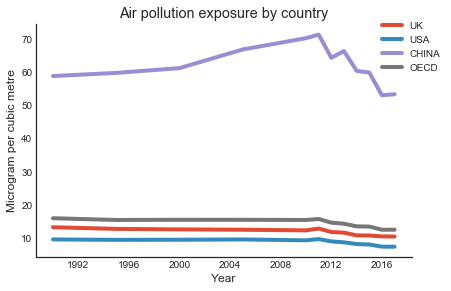

In [59]:
# multiple line plot
# example templates: https://www.kaggle.com/andyxie/matplotlib-plot-multiple-lines


plt.plot(airpoll_UK['TIME'], airpoll_UK['Value'], '-', label='UK')
plt.plot(airpoll_USA['TIME'], airpoll_USA['Value'], '-', label='USA') # could use '--' for dashed lined 
plt.plot(airpoll_CHN['TIME'], airpoll_CHN['Value'], '-', label='CHINA'),
plt.plot(airpoll_OECD['TIME'], airpoll_OECD['Value'], '-', label='OECD') # could use '-.' for dot-dashed lined 
#plt.legend(loc="upper left", bbox_to_anchor=(1, 0.5))
plt.legend(bbox_to_anchor=(1.1, 1.05))
sns.set_style("white")
plt.title('Air pollution exposure by country')
plt.xlabel('Year') # Set x-axis label
plt.ylabel('Microgram per cubic metre') # Set y-axis label
sns.despine()
plt.show()

In [19]:
impact= pd.read_csv('Burke, Hsiang, and Miguel (2015) GDPcap_ClimateChange.csv')

In [20]:
impact.head()

,ISO3,ISO2,name,meantemp,2010,2011,2012,2013,2014,2015,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,AFG,AF,Afghanistan,13.127500,282.958,290.060,297.081,304.005,310.817,317.500,...,11974.321,12241.311,12505.167,12765.380,13021.435,13272.815,13524.757,13777.059,14029.511,14281.896
1,AGO,AO,Angola,22.054800,1560.830,1603.048,1650.009,1702.049,1759.546,1822.926,...,5930.291,5864.547,5793.645,5717.772,5637.129,5551.928,5464.681,5375.513,5284.548,5191.914
2,ALB,AL,Albania,13.419000,2119.348,2158.593,2201.943,2249.603,2301.801,2358.793,...,14710.679,14856.468,15001.151,15144.625,15286.786,15427.527,15565.570,15700.774,15832.999,15962.104
3,ARE,AE,United Arab Emirates,26.918710,47664.018,48300.015,48938.726,49579.891,50223.244,50868.507,...,18112.293,17523.426,16955.071,16406.472,15876.904,15365.668,14870.893,14392.050,13928.626,13480.124
4,ARG,AR,Argentina,17.335556,5021.410,5195.854,5372.299,5550.531,5730.325,5911.443,...,23599.125,23641.760,23676.796,23704.166,23723.810,23735.674,23741.232,23740.447,23733.286,23719.723


In [8]:
impact.describe()

,meantemp,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02
mean,18.742249,8050.288103,8197.738491,8354.396794,8520.415915,8696.048364,8881.658455,9075.775358,9278.750618,9490.982018,...,51333.566248,52799.195145,5.433159e+04,5.593459e+04,5.761228e+04,5.936900e+04,6.120930e+04,6.313796e+04,6.515997e+04,6.728067e+04
std,7.479807,12699.537898,12894.824788,13100.120856,13314.514500,13537.207337,13767.543878,14002.084230,14240.597438,14482.866588,...,107056.748152,112083.374246,1.174043e+05,1.230390e+05,1.290082e+05,1.353344e+05,1.420346e+05,1.491337e+05,1.566582e+05,1.646368e+05
min,-0.733448,148.956000,155.802000,163.001000,170.573000,178.537000,186.917000,196.112000,206.201000,217.274000,...,2250.378000,2185.999000,2.120564e+03,2.052626e+03,1.984893e+03,1.917485e+03,1.850926e+03,1.785284e+03,1.720623e+03,1.657001e+03
25%,11.922667,683.894000,704.046000,719.368000,749.556000,773.272000,806.475000,835.361000,868.071000,907.854000,...,6482.497000,6392.905000,6.330867e+03,6.218161e+03,6.117445e+03,6.015706e+03,5.997295e+03,5.967513e+03,5.828372e+03,5.688633e+03
50%,20.767742,2255.577000,2263.748000,2280.708000,2318.680000,2449.605000,2532.704000,2688.839000,2857.542000,3024.582000,...,12276.687000,12253.912000,1.210757e+04,1.192248e+04,1.174644e+04,1.156397e+04,1.160192e+04,1.179301e+04,1.195561e+04,1.169021e+04
75%,25.498710,7761.720000,8018.317000,8276.797000,8536.778000,8797.859000,9059.622000,9331.452000,9613.763000,9906.988000,...,43054.576000,43822.153000,4.504640e+04,4.627844e+04,4.751694e+04,4.876051e+04,4.960205e+04,5.024323e+04,5.088349e+04,5.152245e+04
max,28.604194,59060.335000,59373.218000,60735.006000,63153.032000,65440.329000,67575.077000,69673.662000,71728.147000,73730.529000,...,914720.029000,964676.699000,1.017745e+06,1.074136e+06,1.134074e+06,1.197800e+06,1.265521e+06,1.337504e+06,1.414037e+06,1.495428e+06


In [9]:
impact.shape

(165, 93)

In [ ]:
percentageChange = impact.pct_change()

# Create cloropleth map

It's easier to visualise the scale of the problem, this is where we will use the shapefiles we downloaded earlier.  

A Cholorpheth map is a type of 'heat map' 

More to read on formatting maps: http://geopandas.org/mapping.html 

In [10]:
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [11]:
#Merge dataframes gdf and df_2016.
merged = gdf.merge(impact, left_on = 'country_code', right_on = 'ISO3')

In [15]:
# check that is looks right 
merged.head(n=2)

,country,country_code,geometry,ISO2,name,meantemp,2010,2011,2012,2013,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJ,Fiji,23.803871,3116.961,3158.028,3202.683,3251.056,...,25433.979,25434.271,25419.949,25391.006,25347.462,25289.364,25221.635,25144.329,25057.509,24961.250
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZ,Tanzania,22.486364,322.588,334.438,347.207,360.963,...,5054.452,5003.556,4948.440,4889.239,4826.103,4759.187,4690.459,4620.014,4547.948,4474.361


All this graph shows us is the mean temperature globally 

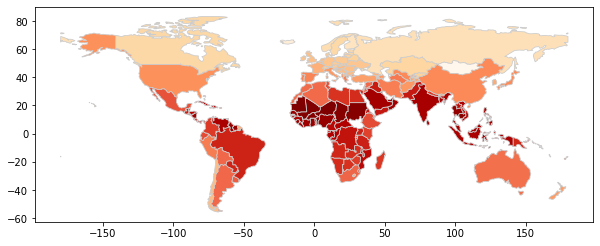

In [14]:
# set a variable that will call whatever column we want to visualise on the map
meantemp = 'meantemp'
# set the range for the choropleth
vmin, vmax = 100, 250
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=meantemp, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

In [16]:
impact.index

Index(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI',
       ...
       'UZB', 'VCT', 'VEN', 'VNM', 'VUT', 'WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='ISO3', length=165)

In [65]:
# we need to turn from wide to long

impact2["ISO2"] = impact2.index
impact2 = pd.wide_to_long(impact, [""], i=["ISO2", "name"], j="year")

impact2 = impact2.rename(columns={'': 'temp'})

In [66]:
impact2.head(n=5)

meantemp ISO3     temp
ISO2 name        year                        
AF   Afghanistan 2010   13.1275  AFG  282.958
                 2011   13.1275  AFG  290.060
                 2012   13.1275  AFG  297.081
                 2013   13.1275  AFG  304.005
                 2014   13.1275  AFG  310.817

In [73]:
impact2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14850 entries, (AF, Afghanistan, 2010) to (ZW, Zimbabwe, 2099)
Data columns (total 3 columns):
meantemp    14850 non-null float64
ISO3        14850 non-null object
temp        14850 non-null float64
dtypes: float64(2), object(1)
memory usage: 429.0+ KB


In [74]:
impact2 = impact2.reset_index(level=['name', 'year'])

In [75]:
impact2.head(n=2)

,name,year,meantemp,ISO3,temp
ISO2,,,,,
AF,Afghanistan,2010,13.1275,AFG,282.958
AF,Afghanistan,2011,13.1275,AFG,290.060


In [80]:
impact2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14850 entries, AF to ZW
Data columns (total 5 columns):
name        14850 non-null object
year        14850 non-null int64
meantemp    14850 non-null float64
ISO3        14850 non-null object
temp        14850 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1016.1+ KB


In [81]:
print(impact2[impact2['ISO3'] == 'AFG'])

             name  year  meantemp ISO3       temp
ISO2                                             
AF    Afghanistan  2010   13.1275  AFG    282.958
AF    Afghanistan  2011   13.1275  AFG    290.060
AF    Afghanistan  2012   13.1275  AFG    297.081
AF    Afghanistan  2013   13.1275  AFG    304.005
AF    Afghanistan  2014   13.1275  AFG    310.817
...           ...   ...       ...  ...        ...
AF    Afghanistan  2095   13.1275  AFG  13272.815
AF    Afghanistan  2096   13.1275  AFG  13524.757
AF    Afghanistan  2097   13.1275  AFG  13777.059
AF    Afghanistan  2098   13.1275  AFG  14029.511
AF    Afghanistan  2099   13.1275  AFG  14281.896

[90 rows x 5 columns]
